In [1]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt

In [7]:
quandl.ApiConfig.api_key = 'zdw7NQYFYvGVdBjHbbuH'

In [5]:
crash = quandl.get("YALE/NHPI", authtoken="zdw7NQYFYvGVdBjHbbuH")
crash.head()

,Index
Date,
1890-12-31,3.557296
1891-12-31,3.209111
1892-12-31,3.267142
1893-12-31,3.406416
1894-12-31,3.969316


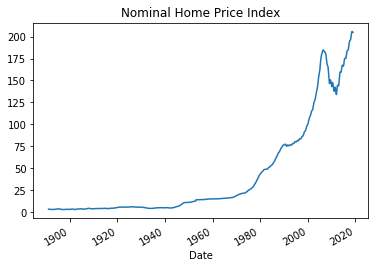

In [23]:
crash['Index'].plot()
plt.title('Nominal Home Price Index')
plt.show()

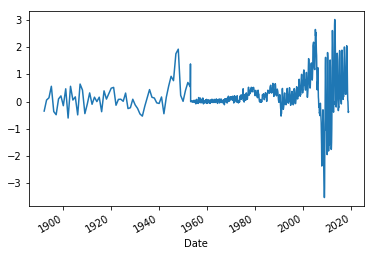

In [11]:
crash['diff_1'] = crash['Index'] - crash['Index'].shift(periods=1)
crash.diff_1.plot(y='diff_1')
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

# raw data
x = crash['Index']
result = adfuller(x)
print('Data:')
print('ADF Statistic %f' % result[0])
print('p-value: %f' % result[1])

# differenced data
x_diff = crash['diff_1'].iloc[1:]
result = adfuller(x_diff)
print('\nDifferenced Data:')
print('ADF Statistic %f' % result[0])
print('p-value: %f' % result[1])

Data:
ADF Statistic 0.421447
p-value: 0.982279

Differenced Data:
ADF Statistic -3.751239
p-value: 0.003448


In [13]:
import statsmodels
from statsmodels.tsa.stattools import pacf, acf

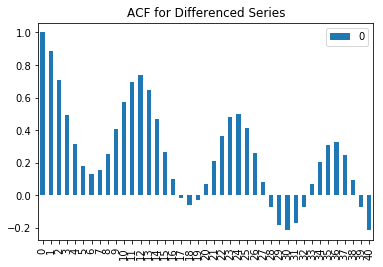

In [14]:
x_acf = pd.DataFrame(acf(x_diff))
x_acf.plot(kind='bar')
plt.title('ACF for Differenced Series')
plt.show()

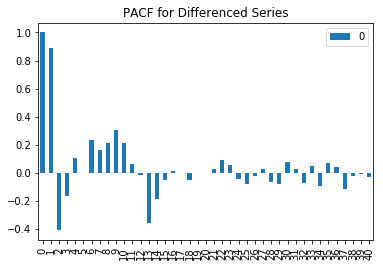

In [15]:
pacf = pd.DataFrame(pacf(x_diff))
pacf.plot(kind='bar')
plt.title('PACF for Differenced Series')
plt.show()

In [27]:
from statsmodels.tsa.arima_model import ARIMA

model_011 = ARIMA(crash['Index'], order=(0,1,1))
model_011_fit = model_011.fit()
print(model_011_fit.summary())
print('Residuals Description')
print(model_110_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.Index   No. Observations:                  855
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -507.223
Method:                       css-mle   S.D. of innovations              0.438
Date:                Tue, 21 May 2019   AIC                           1020.445
Time:                        21:13:28   BIC                           1034.699
Sample:                             1   HQIC                          1025.904
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2342      0.026      8.964      0.000       0.183       0.285
ma.L1.D.Index     0.7464      0.016     47.082      0.000       0.715       0.777
                                    Root

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [61]:
model_214 = ARIMA(crash['Index'], order=(2,1,4))
model_214_fit = model_112.fit()
print(model_214_fit.summary())
print('Residuals Description')
print(model_214_fit.resid.describe())

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Index   No. Observations:                  855
Model:                 ARIMA(2, 1, 4)   Log Likelihood                 -79.700
Method:                       css-mle   S.D. of innovations              0.265
Date:                Tue, 21 May 2019   AIC                            175.401
Time:                        23:12:23   BIC                            213.410
Sample:                             1   HQIC                           189.956
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2343      0.041      5.723      0.000       0.154       0.315
ar.L1.D.Index     1.5865      0.033     48.368      0.000       1.522       1.651
ar.L2.D.Index    -0.8401      0.031    -

In [54]:
model_212 = ARIMA(crash['Index'], order=(2,1,2))
model_212_fit = model_212.fit()
print(model_212_fit.summary())
print('Residuals Description')
print(model_212_fit.resid.describe())

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Index   No. Observations:                  855
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -113.924
Method:                       css-mle   S.D. of innovations              0.276
Date:                Tue, 21 May 2019   AIC                            239.848
Time:                        22:29:44   BIC                            268.354
Sample:                             1   HQIC                           250.764
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2311      0.056      4.144      0.000       0.122       0.340
ar.L1.D.Index     1.3161      0.085     15.533      0.000       1.150       1.482
ar.L2.D.Index    -0.4901      0.074     

In [59]:
model_123 = ARIMA(crash['Index'], order=(2,1,0))
model_123_fit = model_123.fit()
print(model_123_fit.summary())
print('Residuals Description')
print(model_123_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.Index   No. Observations:                  855
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -127.265
Method:                       css-mle   S.D. of innovations              0.280
Date:                Tue, 21 May 2019   AIC                            262.531
Time:                        22:45:18   BIC                            281.535
Sample:                             1   HQIC                           269.808
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2303      0.062      3.739      0.000       0.110       0.351
ar.L1.D.Index     1.2543      0.031     40.219      0.000       1.193       1.315
ar.L2.D.Index    -0.4096      0.031    -

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [53]:
model_216 = ARIMA(crash['Index'], order=(2,1,6))
model_216_fit = model_216.fit()
print(model_216_fit.summary())
print('Residuals Description')
print(model_216_fit.resid.describe())

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Index   No. Observations:                  855
Model:                 ARIMA(2, 1, 6)   Log Likelihood                 -55.582
Method:                       css-mle   S.D. of innovations              0.258
Date:                Tue, 21 May 2019   AIC                            131.163
Time:                        22:29:32   BIC                            178.674
Sample:                             1   HQIC                           149.357
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2336      0.042      5.550      0.000       0.151       0.316
ar.L1.D.Index     1.6519      0.021     80.427      0.000       1.612       1.692
ar.L2.D.Index    -0.9315      0.020    -

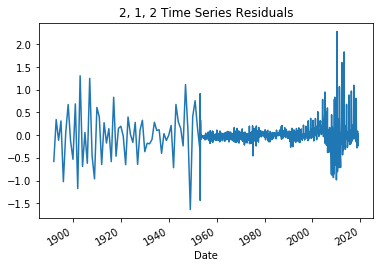

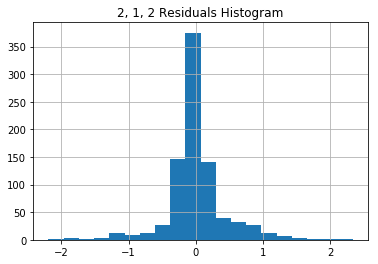

In [45]:
residuals_212 = pd.DataFrame(model_212_fit.resid)
residuals_212.plot(legend=False)
plt.title('2, 1, 2 Time Series Residuals')

residuals_011.hist(bins=20)
plt.title('2, 1, 2 Residuals Histogram')

plt.show()

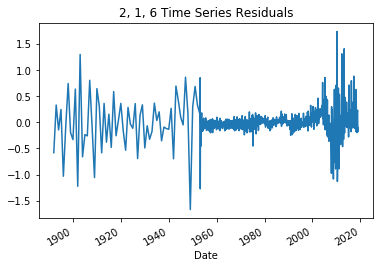

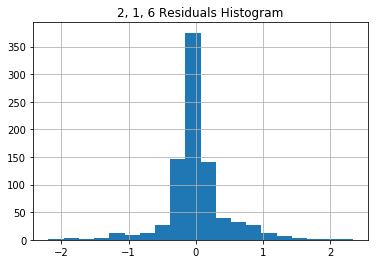

In [55]:
residuals_216 = pd.DataFrame(model_216_fit.resid)
residuals_216.plot(legend=False)
plt.title('2, 1, 6 Time Series Residuals')

residuals_011.hist(bins=20)
plt.title('2, 1, 6 Residuals Histogram')

plt.show()

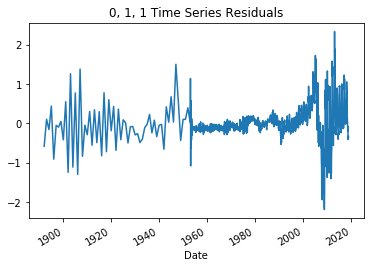

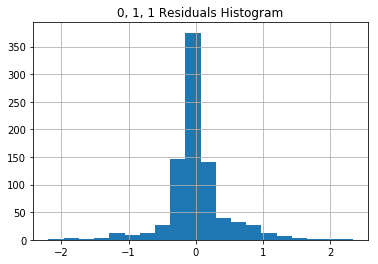

In [21]:
residuals_011 = pd.DataFrame(model_011_fit.resid)
residuals_011.plot(legend=False)
plt.title('0, 1, 1 Time Series Residuals')

residuals_011.hist(bins=20)
plt.title('0, 1, 1 Residuals Histogram')

plt.show()

Model (2,1,6) had the lowest AIC and the constants for all of the models stay relatively around 0.23.

In [62]:
import numpy as np

AIC216 = 131.163
AIC214 = 175.401
AIC212 = 239.848

loss_214 = np.exp((AIC216 - AIC214) / 2)
print(loss_214)

loss_212 = np.exp((AIC216 - AIC212) / 2)
print(loss_212)

2.4765115328255916e-10
2.508141979607374e-24
